<a href="https://colab.research.google.com/github/Shivani-781/Ganga-Water-Quality-Assessment/blob/main/12_Data_Modelling_(DST)_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modelling on DST data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
%matplotlib inline

Reading combined data of all the clusters formed using DST.

In [ ]:
df = pd.read_csv('Dempster Shafer Theory.csv')

In [ ]:
df

,Date,Frame No,COND,DO,ORP,PH,WT,Class
0,12-01-2019 12:57,0,1.100000e-06,3.540000e-14,0.000003,0.000003,0.000003,1
1,12-01-2019 12:58,1,8.390000e-07,8.900000e-13,0.000003,0.000003,0.000003,1
2,12-01-2019 14:54,0,8.470000e-07,2.120000e-14,0.000003,0.000003,0.000003,1
3,12-01-2019 14:55,1,1.280000e-06,3.270000e-14,0.000003,0.000003,0.000003,1
4,12-01-2019 14:56,2,8.260000e-07,1.010000e-14,0.000003,0.000003,0.000003,1
...,...,...,...,...,...,...,...,...
46978,05-03-2020 17:40,193,3.610000e-07,6.190000e-06,0.000071,0.000030,0.000014,0
46979,05-03-2020 17:41,194,3.590000e-07,6.190000e-06,0.000071,0.000030,0.000014,0
46980,05-03-2020 17:42,195,3.600000e-07,6.190000e-06,0.000071,0.000030,0.000014,0
46981,05-03-2020 17:43,196,1.110000e-06,6.560000e-14,0.000003,0.000003,0.000003,1


In [ ]:
X = df.drop(['Date', 'Frame No', 'Class'], axis=1)
y = df['Class'].values

In [ ]:
X_test = X
y_test = y

In [ ]:
n_classes = 4

Modelling data based on DST combinations

# SVM Kernel Trick

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='rbf')
y_score_1 = cross_val_score(svm, X, y, cv=5)
svm_score = y_score_1.mean()
print(svm_score)

0.9489167964939764


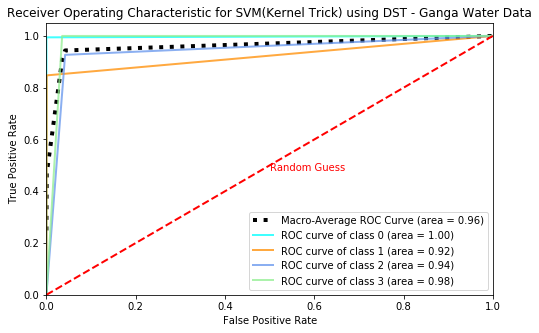

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(svm, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"], alpha = 1.0,
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM(Kernel Trick) using DST - Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [ ]:
#from sklearn.linear_model import LogisticRegression
#lreg = LogisticRegression()
#y_score_2 = cross_val_score(lreg, X, y, cv=5)
#lreg_score = y_score_2.mean()
#print(lreg_score)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_score_3 = cross_val_score(gnb, X, y, cv=5)
gnb_score = y_score_3.mean()
print(gnb_score)

0.9162880031139528


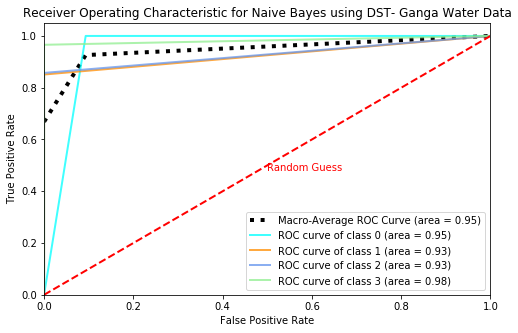

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(gnb, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes using DST- Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, X, y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.9999787143465305


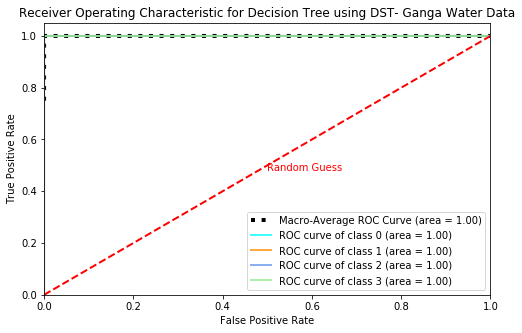

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(dtc, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree using DST- Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Algorithm Comparision

In [ ]:
classifiers = ['SVM_Kernel', 'Naive_Bayes', 'Decision_Tree']
accuracies = [svm_score*100, gnb_score*100, dtc_score*100]
comparision = pd.DataFrame({'Classifier':classifiers,'Accuracy':accuracies}, index = [i for i in range(1,4)])
comparision

,Classifier,Accuracy
1,SVM_Kernel,94.891680
2,Naive_Bayes,91.628800
3,Decision_Tree,99.997871


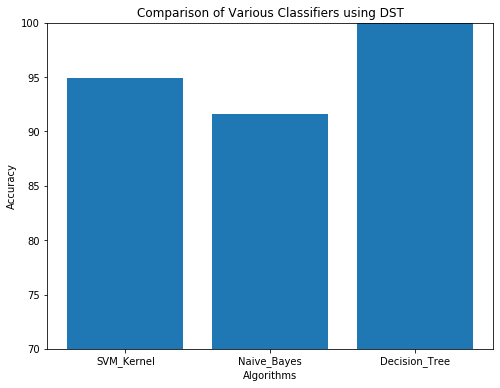

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(range(len(classifiers)), accuracies, align = 'center')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Comparison of Various Classifiers using DST')
plt.ylim([70, 100])
plt.show()

**Decision Tree Model** outperforms the other models.